# Basic example
Running a single system

In [1]:
import pandas as pd
import numpy as np

import binarycpython
from binarycpython.utils.custom_logging_functions import binary_c_log_code
from binarycpython.utils.run_system_wrapper import run_system
from binarycpython.utils.functions import example_parse_output

<AxesSubplot:xlabel='time'>

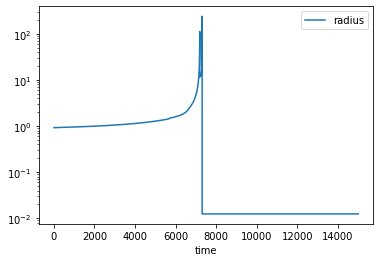

In [10]:
# You can decide to `write` your own logging_line, which allows you to write a more complex logging statement with conditionals.
logging_line = 'Printf("MY_STELLAR_DATA time=%g radius=%g\\n",stardata->model.time,stardata->star[0].radius)'

# Generate entire shared lib code around logging lines
custom_logging_code = binary_c_log_code(logging_line, verbose=-1)

# Run system. all arguments can be given as optional arguments. the custom_logging_code is 
# one of them and will be processed automatically.
output = run_system(
    M_1=1, metallicity=0.002, M_2=0.1, separation=0, orbital_period=100000000000, \
    custom_logging_code=custom_logging_code,
)

df = pd.DataFrame.from_dict(example_parse_output(output, 'MY_STELLAR_DATA'), dtype=np.float64)

df.plot('time', 'radius', logy=True)

<AxesSubplot:xlabel='time'>

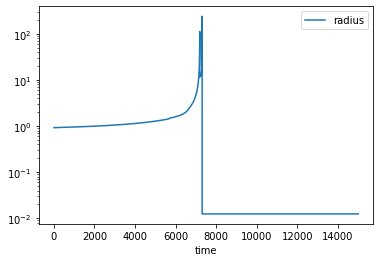